# Notebook to Visualize Land Cover Data 

# Step 0 - Prep Notebook

In [1]:
import pandas as pd
import geopandas as gpd 
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from snowML.datapipe import get_geos as gg


Notes
 - Land cover data from: https://datacore-gn.unepgrid.ch/geonetwork/srv/api/records/2fde4566-a799-4626-a9fd-a45dc6fffb13
 - Example citation:

Defourney, P. et al. (2015): ESA Land Cover Climate Change Initiative (ESA LC_cci) data: <Product name and Version number> via Centre for Environmental Data Analysis, <date of citatio

Product Name: Global land cover 300m (ESA-CCI)

Download from here: 

Description: https://dast.copernicus-climate.eu/documents/satellite-land-cover/WP2-FDDP-LC-2021-2022-SENTINEL3-300m-v2.1.1_PUGS_v1.1_final.pdf  (p.4 for table of flag numerical value to corresponding description)

Variable of interest is lccs_classn>

# Step 1  - Load landcover data 

In [2]:
f = "C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.area-subset.49.5.-66.24.-125.nc"

In [3]:
ds = xr.open_dataset(f)
#ds

In [4]:
unique_states =  ds["lccs_class"]
unique_values = list(np.unique(unique_states))
print(unique_values)

[10, 11, 12, 30, 40, 50, 60, 61, 62, 70, 71, 72, 80, 90, 100, 110, 120, 130, 140, 150, 152, 160, 170, 180, 190, 200, 201, 210, 220]


In [5]:
lccs = ds["lccs_class"]
lccs = lccs.rio.write_crs("EPSG:4326")
#lccs

In [6]:
unique_values = list(np.unique(lccs))
print(unique_values)

[10, 11, 12, 30, 40, 50, 60, 61, 62, 70, 71, 72, 80, 90, 100, 110, 120, 130, 140, 150, 152, 160, 170, 180, 190, 200, 201, 210, 220]


In [7]:
geos = gg.get_geos(17110005, '08')
lccs_mask = lccs.rio.clip(geos.geometry, geos.crs, drop=True)
lccs_mask

/home/suetboyd/miniconda3/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:236: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


<xarray.DataArray 'lccs_class' (time: 1, lat: 349, lon: 431)> Size: 150kB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * lat          (lat) float64 3kB 49.31 49.31 49.31 49.3 ... 48.35 48.35 48.35
  * lon          (lon) float64 3kB -121.9 -121.8 -121.8 ... -120.7 -120.7 -120.7
  * time         (time) datetime64[ns] 8B 2022-01-01
    spatial_ref  int64 8B 0
Attributes:
    standard_name:        land_cover_lccs
    flag_colors:          #ffff64 #ffff64 #ffff00 #aaf0f0 #dcf064 #c8c864 #00...
    long_name:            Land cover class defined in LCCS
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    flag_values:          [  0  10  11  12  20  30  40  50  60  61  62  70  7...

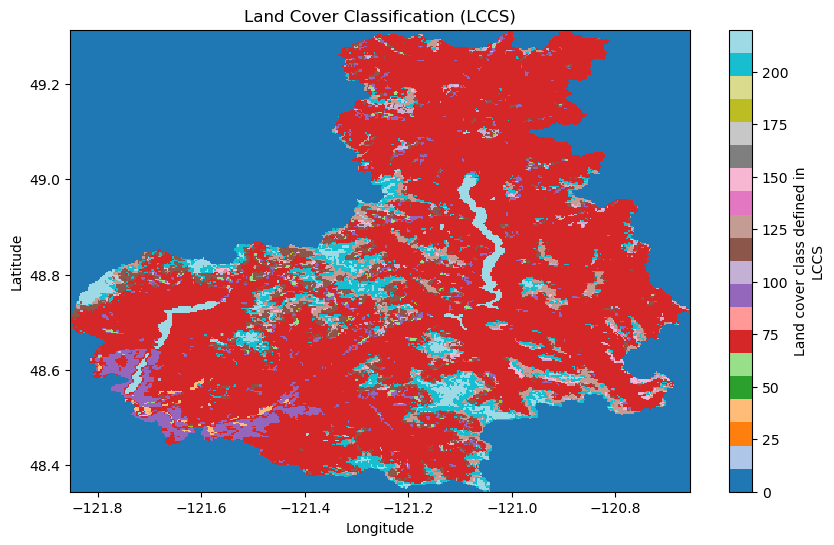

In [8]:
# Plot the data with a colormap
plt.figure(figsize=(10, 6))
lccs_mask.plot(cmap="tab20", add_colorbar=True)  # You can try 'viridis', 'tab20', 'nipy_spectral', etc.
plt.title("Land Cover Classification (LCCS)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
